## Iris Dataset

**Context**: This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Task: Predicting the class of iris plant.


**Reading Data**

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing dataset
df = pd.read_excel("iris.xlsx")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


**Exploring Data**

In [3]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
df['variety'].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

<AxesSubplot:xlabel='variety', ylabel='sepal.length'>

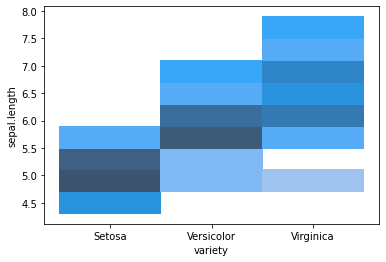

In [6]:
#plotting histogram for sepal length of the three classes
sns.histplot(data=df, x="variety", y="sepal.length")

<AxesSubplot:xlabel='variety', ylabel='sepal.width'>

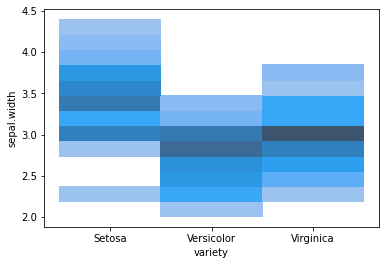

In [7]:
# plotting histogram for sepal width of the three classes
sns.histplot(data=df, x="variety", y="sepal.width")

<AxesSubplot:xlabel='variety', ylabel='petal.length'>

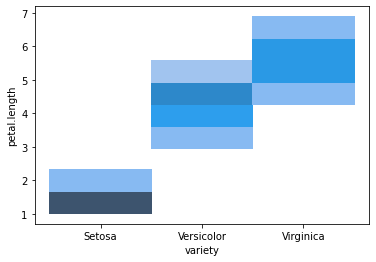

In [8]:
# plotting histogram for petal length of the three classes
sns.histplot(data=df, x="variety", y="petal.length")

<AxesSubplot:xlabel='variety', ylabel='petal.width'>

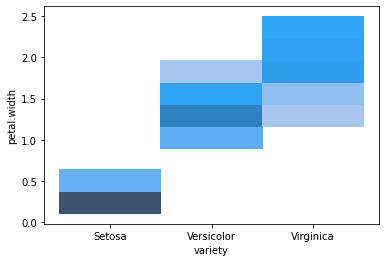

In [9]:
# plotting histogram for petal width of the three classes
sns.histplot(data=df, x="variety", y="petal.width")

From our histograms above, we can see that virginica had the sepal length. Setosa has the largest sepal widths. Virginica also has the largest petal length and width. Setosa has the smallest sepal length, petal length and width. While versicolor had the smallest sepal width.

**Encoding Target Variabele**

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#invoking fit_transform method on object
df['variety']=le.fit_transform(df['variety'])


In [11]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety           int32
dtype: object

**Checking for correlation in Dataset**

We checked for the correlation between the features and target column. As we can see below, sepal.width column has the lowest correlation with the target column(variety).

In [13]:
iris_corr = df.corr()
print(iris_corr)

              sepal.length  sepal.width  petal.length  petal.width   variety
sepal.length      1.000000    -0.117570      0.871754     0.817941  0.782561
sepal.width      -0.117570     1.000000     -0.428440    -0.366126 -0.426658
petal.length      0.871754    -0.428440      1.000000     0.962865  0.949035
petal.width       0.817941    -0.366126      0.962865     1.000000  0.956547
variety           0.782561    -0.426658      0.949035     0.956547  1.000000


<AxesSubplot:>

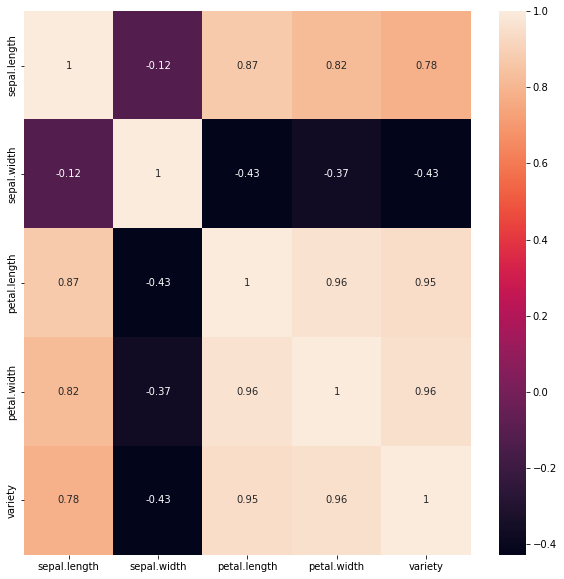

In [14]:
#correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(iris_corr, annot=True)

**Observations from Correlation heatmap**

petal.width, sepal.length and petal.length are all highly correlated -> I choose petal.width

So we drop the other two.


In [15]:
drop_list = ['sepal.length','petal.length']

df.drop(drop_list, axis = 1, inplace=True)

**Splitting Data into train, validation and test set (60.20.20)**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#splitting into 60-20-20 ratios
features = df.drop('variety', axis=1)
labels = df['variety']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [56]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [19]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

### Hyperparameter tuning for 60.20.20 split

We do the hyperparameter tuning on RandomForestClassifer, SVM, and Logistic Regression Models

In [20]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [21]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [22]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 50}

0.9 (+/-0.204) for {'max_depth': 2, 'n_estimators': 5}
0.922 (+/-0.151) for {'max_depth': 2, 'n_estimators': 50}
0.889 (+/-0.186) for {'max_depth': 2, 'n_estimators': 100}
0.922 (+/-0.166) for {'max_depth': 10, 'n_estimators': 5}
0.933 (+/-0.163) for {'max_depth': 10, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': 10, 'n_estimators': 100}
0.911 (+/-0.133) for {'max_depth': 20, 'n_estimators': 5}
0.933 (+/-0.163) for {'max_depth': 20, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': 20, 'n_estimators': 100}
0.922 (+/-0.166) for {'max_depth': None, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': None, 'n_estimators': 50}
0.922 (+/-0.151) for {'max_depth': None, 'n_estimators': 100}


In [23]:
from sklearn.svm import SVC

sv = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
        }

cv_svm = GridSearchCV(sv, parameters, cv=5)
cv_svm.fit(tr_features, tr_labels.values.ravel())

print_results(cv_svm)

BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.933 (+/-0.163) for {'C': 0.1, 'kernel': 'linear'}
0.922 (+/-0.166) for {'C': 0.1, 'kernel': 'rbf'}
0.933 (+/-0.215) for {'C': 1, 'kernel': 'linear'}
0.944 (+/-0.172) for {'C': 1, 'kernel': 'rbf'}
0.944 (+/-0.172) for {'C': 10, 'kernel': 'linear'}
0.944 (+/-0.172) for {'C': 10, 'kernel': 'rbf'}


In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }

cv_lr = GridSearchCV(lr, parameters, cv=5)
cv_lr.fit(tr_features, tr_labels.values.ravel())

print_results(cv_lr)

BEST PARAMS: {'C': 10}

0.422 (+/-0.229) for {'C': 0.001}
0.733 (+/-0.215) for {'C': 0.01}
0.867 (+/-0.166) for {'C': 0.1}
0.933 (+/-0.163) for {'C': 1}
0.944 (+/-0.172) for {'C': 10}
0.933 (+/-0.163) for {'C': 100}
0.922 (+/-0.206) for {'C': 1000}


## Write out pickled models

In [26]:
import joblib
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [27]:
joblib.dump(cv.best_estimator_, '../../../RF_model.pkl')

['../../../RF_model.pkl']

In [28]:
joblib.dump(cv_svm.best_estimator_, '../../../SVM_model.pkl')

['../../../SVM_model.pkl']

In [29]:
joblib.dump(cv_lr.best_estimator_, '../../../LR_model.pkl')

['../../../LR_model.pkl']

## Comparing Model results on Validation and Test

In [30]:
from time import time
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [31]:
models = {}

for mdl in ['LR', 'SVM', 'RF']:
    models[mdl] = joblib.load('../../../{}_model.pkl'.format(mdl))

In [32]:
models

{'LR': LogisticRegression(C=10),
 'RF': RandomForestClassifier(max_depth=10, n_estimators=50),
 'SVM': SVC(C=1)}

In [33]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [34]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 0.933 / Precision: 0.919 / Recall: 0.919 / Latency: 4.0ms
SVM -- Accuracy: 0.967 / Precision: 0.976 / Recall: 0.944 / Latency: 4.0ms
RF -- Accuracy: 0.9 / Precision: 0.877 / Recall: 0.893 / Latency: 16.0ms


We can see from the above scores that SVM performs the best on the validation data, so we'll check for the test data next.

In [35]:
evaluate_model('SVM', models['SVM'], te_features, te_labels)
evaluate_model('Random Forest', models['RF'], te_features, te_labels)
evaluate_model('Logistic Regression', models['LR'], te_features, te_labels)

SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 4.0ms
Random Forest -- Accuracy: 0.967 / Precision: 0.974 / Recall: 0.944 / Latency: 16.0ms
Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.0ms


The SVM model performs the best on the Validation and Test Set, the Logistic Regression model also had great scores on the test set but the SVM model performed better on the validation set. They also had similar runtime, while the random forest performed the least among the 3 models and also had a longer run time.

## Splitting Data into train, validation and test set (80.10.10)

In [36]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test1, X_val1, y_test1, y_val1 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

In [37]:
for dataset in [y_train1, y_val1, y_test1]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


In [38]:
X_train1.to_csv('train_features1.csv', index=False)
X_val1.to_csv('val_features1.csv', index=False)
X_test1.to_csv('test_features1.csv', index=False)

y_train1.to_csv('train_labels1.csv', index=False)
y_val1.to_csv('val_labels1.csv', index=False)
y_test1.to_csv('test_labels1.csv', index=False)

### Hyperparameter tuning for 80.10.10 split

We do the hyperparameter tuning on RandomForestClassifer, SVM, and Logistic Regression Models

In [41]:
tr_features1 = pd.read_csv('train_features1.csv')
tr_labels1 = pd.read_csv('train_labels1.csv')

In [43]:
#Grid Search for RandomForestClassifier
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv1 = GridSearchCV(rf, parameters, cv=5)
cv1.fit(tr_features1, tr_labels1.values.ravel())

print_results(cv1)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 100}

0.883 (+/-0.232) for {'max_depth': 2, 'n_estimators': 5}
0.917 (+/-0.139) for {'max_depth': 2, 'n_estimators': 50}
0.925 (+/-0.143) for {'max_depth': 2, 'n_estimators': 100}
0.917 (+/-0.129) for {'max_depth': 10, 'n_estimators': 5}
0.925 (+/-0.153) for {'max_depth': 10, 'n_estimators': 50}
0.925 (+/-0.153) for {'max_depth': 10, 'n_estimators': 100}
0.908 (+/-0.133) for {'max_depth': 20, 'n_estimators': 5}
0.917 (+/-0.139) for {'max_depth': 20, 'n_estimators': 50}
0.925 (+/-0.153) for {'max_depth': 20, 'n_estimators': 100}
0.917 (+/-0.175) for {'max_depth': None, 'n_estimators': 5}
0.925 (+/-0.153) for {'max_depth': None, 'n_estimators': 50}
0.925 (+/-0.153) for {'max_depth': None, 'n_estimators': 100}


In [44]:
#GridSearch for SVM 
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
        }

cv_svm1 = GridSearchCV(sv, parameters, cv=5)
cv_svm1.fit(tr_features1, tr_labels1.values.ravel())

print_results(cv_svm1)

BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.933 (+/-0.113) for {'C': 0.1, 'kernel': 'linear'}
0.867 (+/-0.062) for {'C': 0.1, 'kernel': 'rbf'}
0.942 (+/-0.113) for {'C': 1, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 1, 'kernel': 'rbf'}
0.942 (+/-0.113) for {'C': 10, 'kernel': 'linear'}
0.942 (+/-0.113) for {'C': 10, 'kernel': 'rbf'}


In [45]:
#Grid Search for Logistic Regression Model
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }

cv_lr1 = GridSearchCV(lr, parameters, cv=5)
cv_lr1.fit(tr_features1, tr_labels1.values.ravel())

print_results(cv_lr1)

BEST PARAMS: {'C': 10}

0.642 (+/-0.085) for {'C': 0.001}
0.9 (+/-0.187) for {'C': 0.01}
0.892 (+/-0.194) for {'C': 0.1}
0.933 (+/-0.113) for {'C': 1}
0.95 (+/-0.122) for {'C': 10}
0.942 (+/-0.155) for {'C': 100}
0.942 (+/-0.155) for {'C': 1000}


In [46]:
joblib.dump(cv1.best_estimator_, '../../../RF_model1.pkl')

['../../../RF_model1.pkl']

In [47]:
joblib.dump(cv_svm1.best_estimator_, '../../../SVM_model1.pkl')

['../../../SVM_model1.pkl']

In [48]:
joblib.dump(cv_lr1.best_estimator_, '../../../LR_model1.pkl')

['../../../LR_model1.pkl']

## Comparing Model results on Validation and Test for 80-10-10 Split

In [49]:
val_features1 = pd.read_csv('val_features1.csv')
val_labels1 = pd.read_csv('val_labels1.csv')

te_features1 = pd.read_csv('test_features1.csv')
te_labels1 = pd.read_csv('test_labels1.csv')

In [50]:
models1 = {}

for mdl1 in ['LR', 'SVM', 'RF']:
    models1[mdl1] = joblib.load('../../../{}_model1.pkl'.format(mdl1))

In [51]:
models1

{'LR': LogisticRegression(C=10),
 'RF': RandomForestClassifier(max_depth=2),
 'SVM': SVC(C=1)}

In [52]:
def evaluate_model1(name, model1, features, labels):
    start = time()
    pred = model1.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [54]:
for name, mdl1 in models1.items():
    evaluate_model1(name, mdl1, val_features1, val_labels1)

LR -- Accuracy: 0.933 / Precision: 0.933 / Recall: 0.944 / Latency: 4.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 4.0ms
RF -- Accuracy: 0.933 / Precision: 0.933 / Recall: 0.944 / Latency: 19.0ms


In [55]:
evaluate_model1('SVM', models1['SVM'], te_features1, te_labels1)
evaluate_model1('Random Forest', models1['RF'], te_features1, te_labels1)
evaluate_model1('Logistic Regression', models1['LR'], te_features1, te_labels1)

SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.0ms
Random Forest -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 20.0ms
Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.0ms


For our 80-10-10 split, SVM model also performed the best in predicting. It had the better scores on the Validation and Test Data, although all the models had the same scores on the Test Data. The SVM model had the best scores in the Validation and Test Data.

## Conclusion

#### 60-20-20 Split results for Validation Data:
<li> LR -- Accuracy: 0.933 / Precision: 0.919 / Recall: 0.919 / Latency: 4.0ms </li>
<li> SVM -- Accuracy: 0.967 / Precision: 0.976 / Recall: 0.944 / Latency: 4.0ms </li>
<li> RF -- Accuracy: 0.9 / Precision: 0.877 / Recall: 0.893 / Latency: 16.0ms </li>

#### 80-10-10 Split results for Validation Data:
<li> LR -- Accuracy: 0.933 / Precision: 0.933 / Recall: 0.944 / Latency: 4.0ms </li>
<li> SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 4.0ms </li>
<li> RF -- Accuracy: 0.933 / Precision: 0.933 / Recall: 0.944 / Latency: 19.0ms </li>

While testing both splits on the validation data, we can see from the above scores that 80-10-10 split had the best scores for each model.
Moving on to the Test Data;

#### 60-20-20 Split results for Test Data:
<li> SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 4.0ms </li>
<li> Random Forest -- Accuracy: 0.967 / Precision: 0.974 / Recall: 0.944 / Latency: 16.0ms </li>
<li> Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.0ms </li>
 
#### 80-10-10 Split results for Test Data:
<li> SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.0ms </li>
<li> Random Forest -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 20.0ms </li>
<li> Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.0ms </li>

We can also see in the above scores that the 80-10-10 Split ratio had the better scores. From our two results above, we can conclude that the 80-10-10 split ratio has the best performance. But there may be a case of overfitting in our models since we're getting perfect scores.